In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
results = {sheet: pd.read_excel('Sensitivity Results.xlsx', sheet_name=sheet, index_col=0) for sheet in pd.ExcelFile('Sensitivity Results.xlsx').sheet_names}
measurements = list(results.keys())

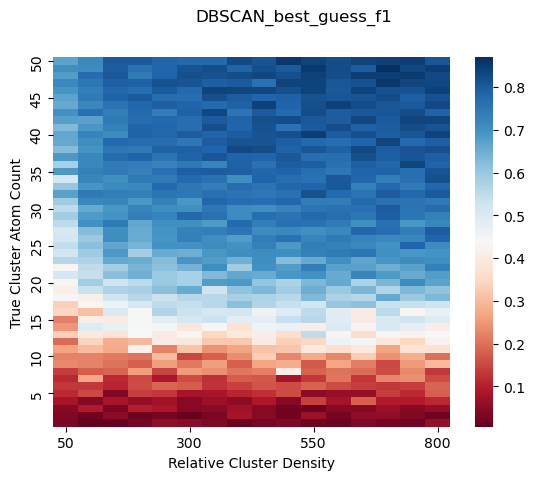

In [4]:
fig, ax = plt.subplots()
fig.suptitle(measurements[1])
data = (results[measurements[1]]).loc[::-1]
sns.heatmap(data, ax=ax, xticklabels=5, yticklabels=5, cmap='RdBu')
ax.set_xlabel('Relative Cluster Density')
ax.set_ylabel('True Cluster Atom Count')
pass

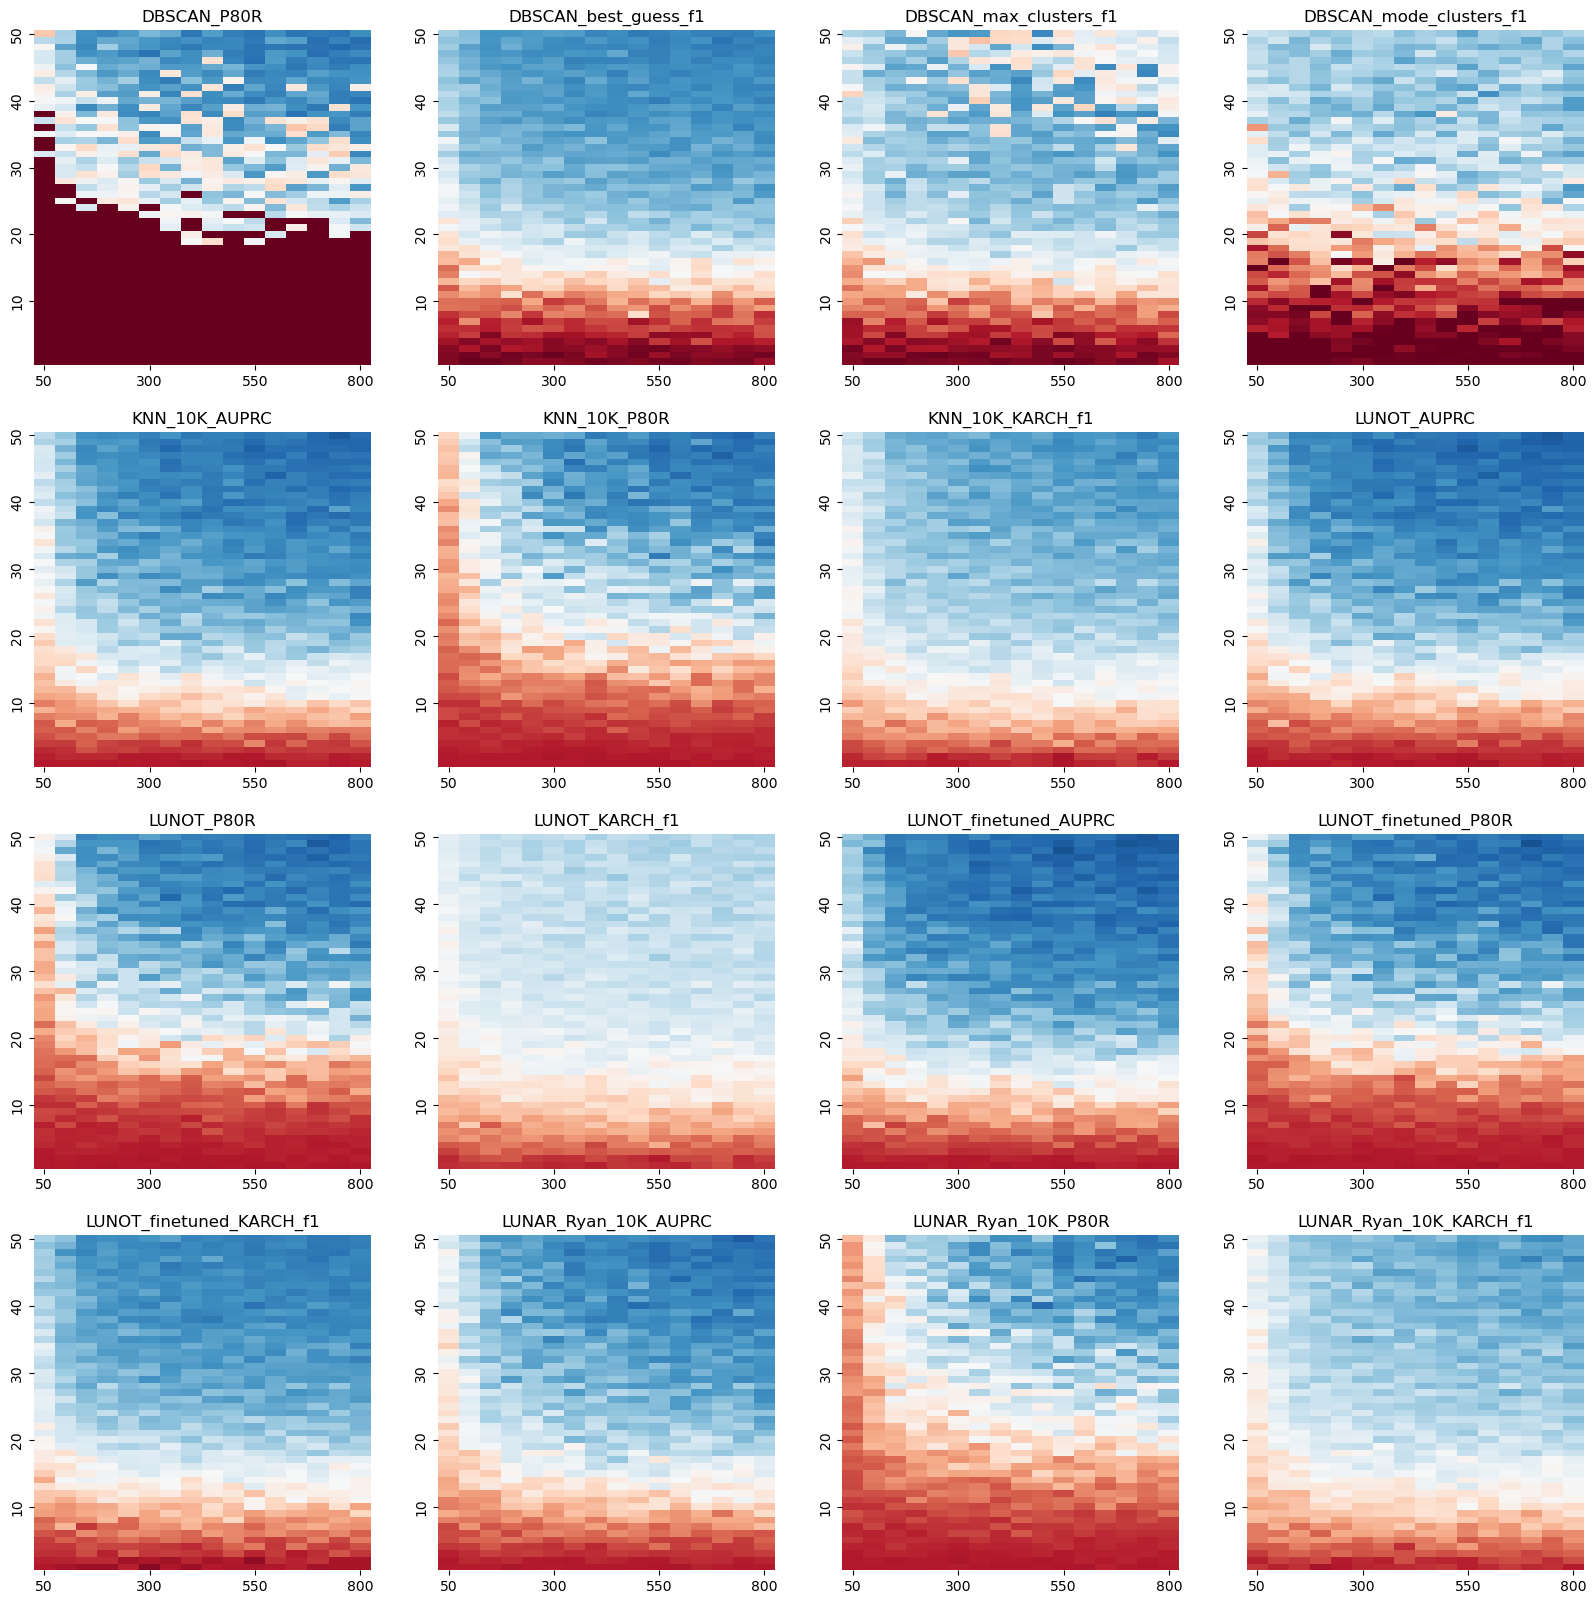

In [5]:
fig, ax = plt.subplots(nrows=4, ncols=4)
fig.set_size_inches(w=20, h=20)

for i, measurement in enumerate(measurements):
    axis = ax[i//4, i%4]
    axis.set_title(measurement)
    sns.heatmap(results[measurement].loc[::-1], ax=axis, vmin=0, vmax=1, xticklabels=5, yticklabels=10, cmap='RdBu', cbar=False)

<Axes: >

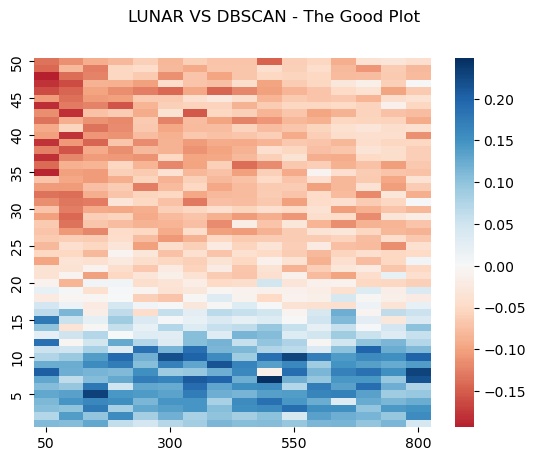

In [6]:
fig, ax = plt.subplots()
fig.suptitle('LUNAR VS DBSCAN - The Good Plot')
data = (results['LUNAR_Ryan_10K_KARCH_f1']-results['DBSCAN_best_guess_f1']).iloc[::-1]
sns.heatmap(data, ax=ax, center=0, xticklabels=5, yticklabels=5, cmap='RdBu')

<Axes: >

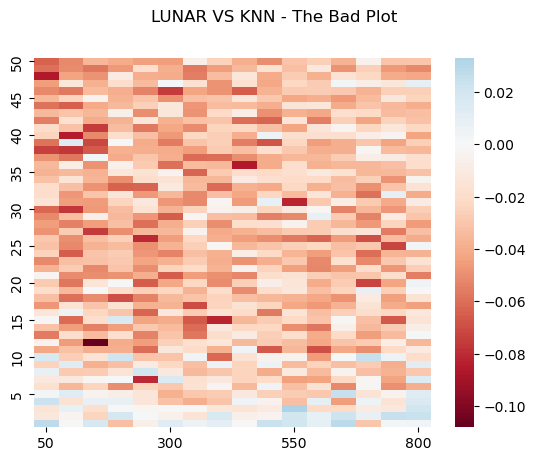

In [7]:
fig, ax = plt.subplots()
fig.suptitle('LUNAR VS KNN - The Bad Plot')
data = (results['LUNAR_Ryan_10K_KARCH_f1']-results['KNN_10K_KARCH_f1']).iloc[::-1]
sns.heatmap(data, ax=ax, center=0, xticklabels=5, yticklabels=5, cmap='RdBu')

<Axes: >

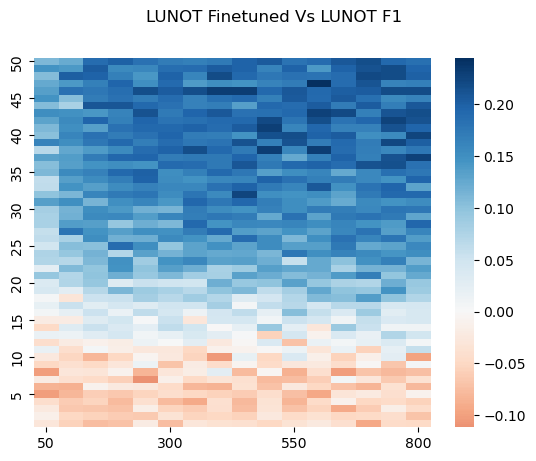

In [8]:
fig, ax = plt.subplots()
fig.suptitle('LUNOT Finetuned Vs LUNOT F1')
data = (results['LUNOT_finetuned_KARCH_f1']-results['LUNOT_KARCH_f1']).iloc[::-1]
sns.heatmap(data, ax=ax, center=0, xticklabels=5, yticklabels=5, cmap='RdBu')

<Axes: >

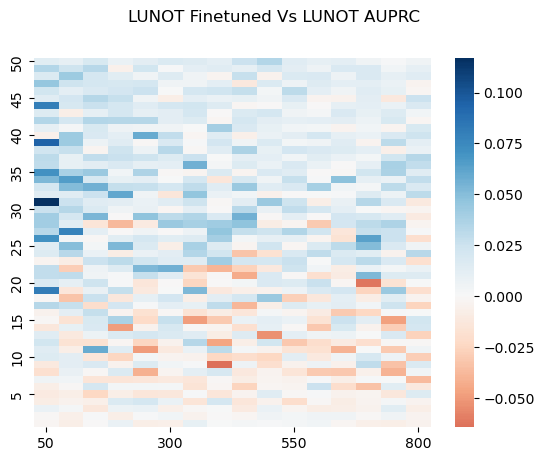

In [9]:
fig, ax = plt.subplots()
fig.suptitle('LUNOT Finetuned Vs LUNOT AUPRC')
data = (results['LUNOT_finetuned_AUPRC']-results['LUNOT_AUPRC']).iloc[::-1]
sns.heatmap(data, ax=ax, center=0, xticklabels=5, yticklabels=5, cmap='RdBu')

In [10]:
results = {sheet: pd.read_excel('Neighbours Results.xlsx', sheet_name=sheet, index_col=0) for sheet in pd.ExcelFile('Neighbours Results.xlsx').sheet_names}
measurements = list(results.keys())

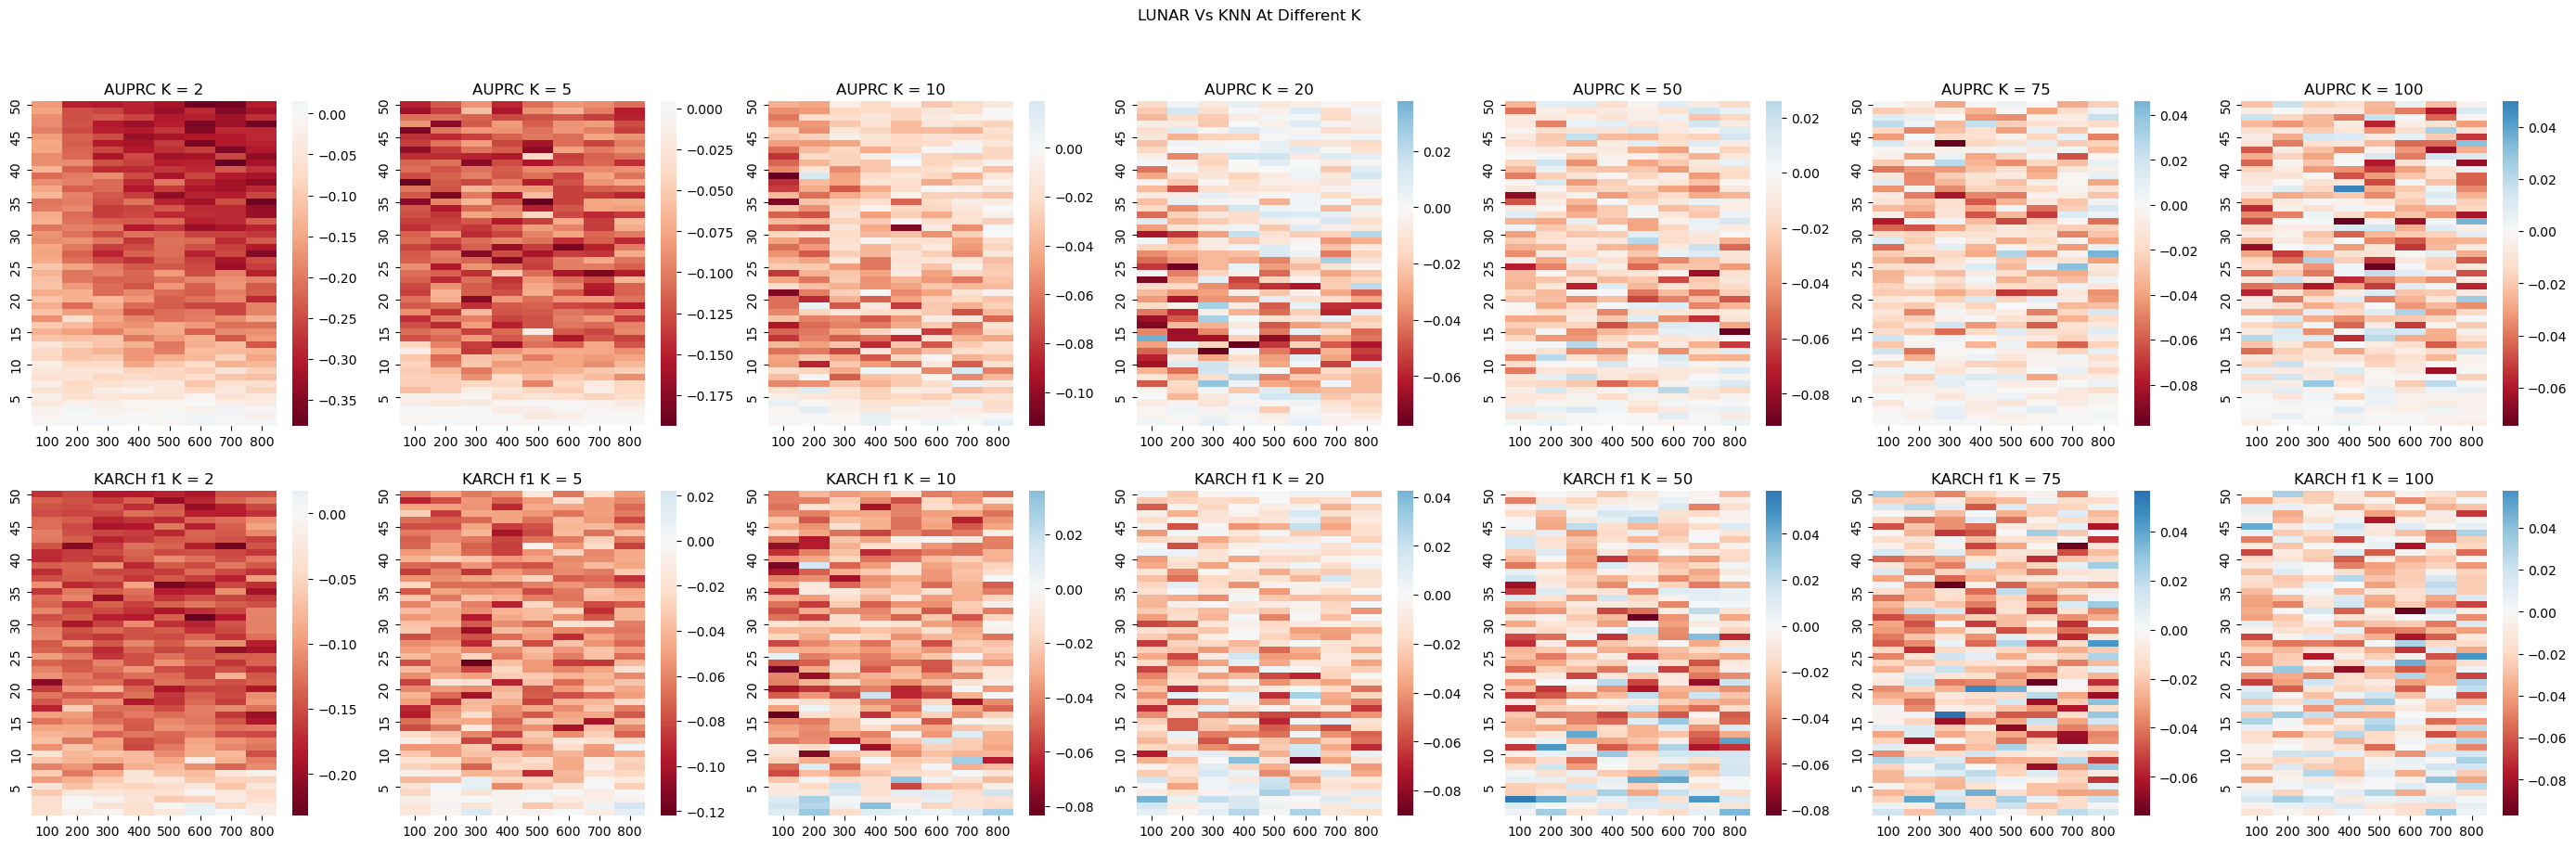

In [11]:
fig, ax = plt.subplots(ncols=7, nrows=2)
fig.suptitle('LUNAR Vs KNN At Different K')
fig.set_size_inches(w=35, h=10)

for i, neighbours in enumerate([2, 5, 10, 20, 50, 75, 100]):
    ax[0, i].set_title(f'AUPRC K = {neighbours}')
    AUPRC_data = results[f'LUNAR_{neighbours}K_AUPRC'] - results[f'KNN_{neighbours}K_AUPRC']
    sns.heatmap(AUPRC_data.iloc[::-1], ax=ax[0, i], center=0, cmap='RdBu', yticklabels=5)
    ax[1, i].set_title(f'KARCH f1 K = {neighbours}')
    KARCH_f1_data = results[f'LUNAR_{neighbours}K_KARCH_f1'] - results[f'KNN_{neighbours}K_KARCH_f1']
    sns.heatmap(KARCH_f1_data.iloc[::-1], ax=ax[1, i], center=0, cmap='RdBu', yticklabels=5)

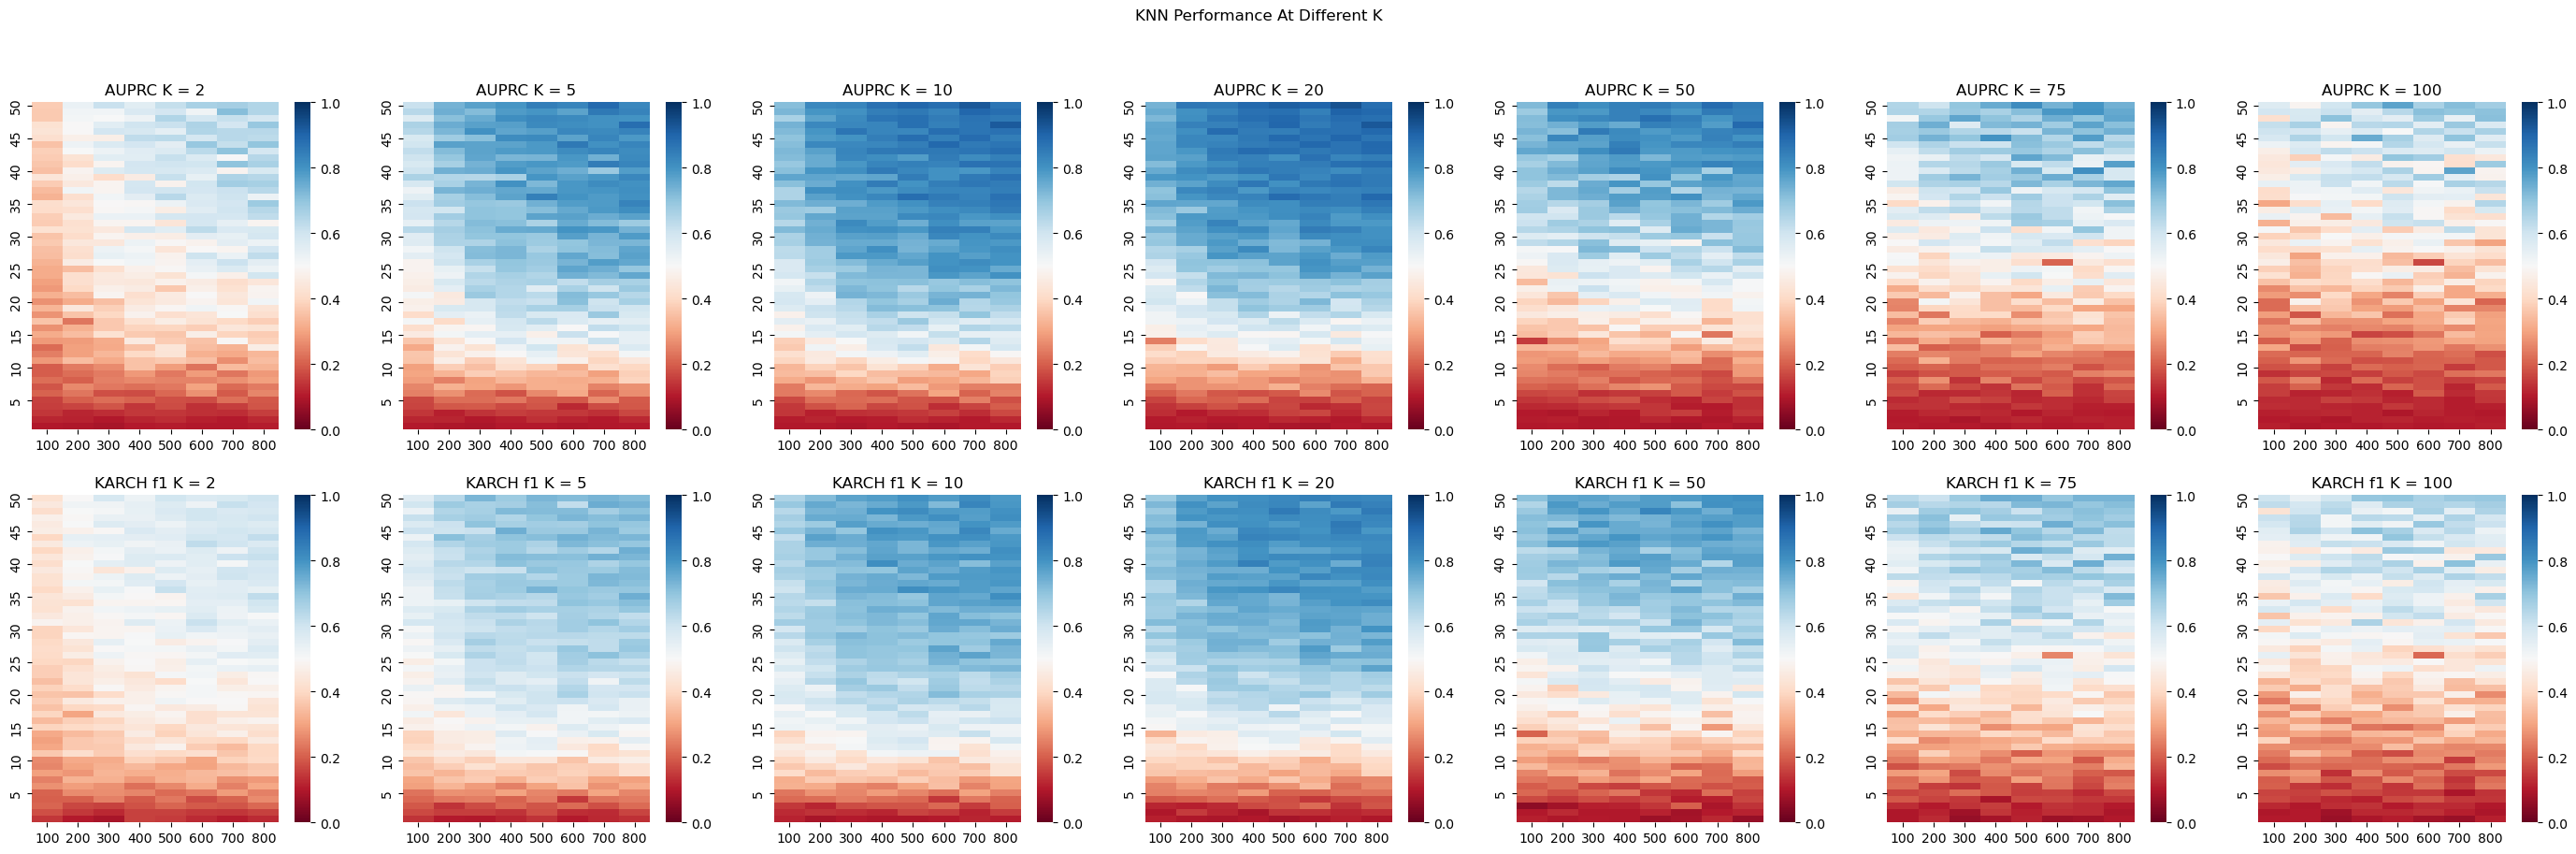

In [13]:
fig, ax = plt.subplots(ncols=7, nrows=2)
fig.suptitle('KNN Performance At Different K')
fig.set_size_inches(w=35, h=10)

for i, neighbours in enumerate([2, 5, 10, 20, 50, 75, 100]):
    ax[0, i].set_title(f'AUPRC K = {neighbours}')
    AUPRC_data = results[f'KNN_{neighbours}K_AUPRC']
    sns.heatmap(AUPRC_data.iloc[::-1], ax=ax[0, i], vmin=0, vmax=1, cmap='RdBu', yticklabels=5)
    ax[1, i].set_title(f'KARCH f1 K = {neighbours}')
    KARCH_f1_data = results[f'KNN_{neighbours}K_KARCH_f1']
    sns.heatmap(KARCH_f1_data.iloc[::-1], ax=ax[1, i], vmin=0, vmax=1, cmap='RdBu', yticklabels=5)

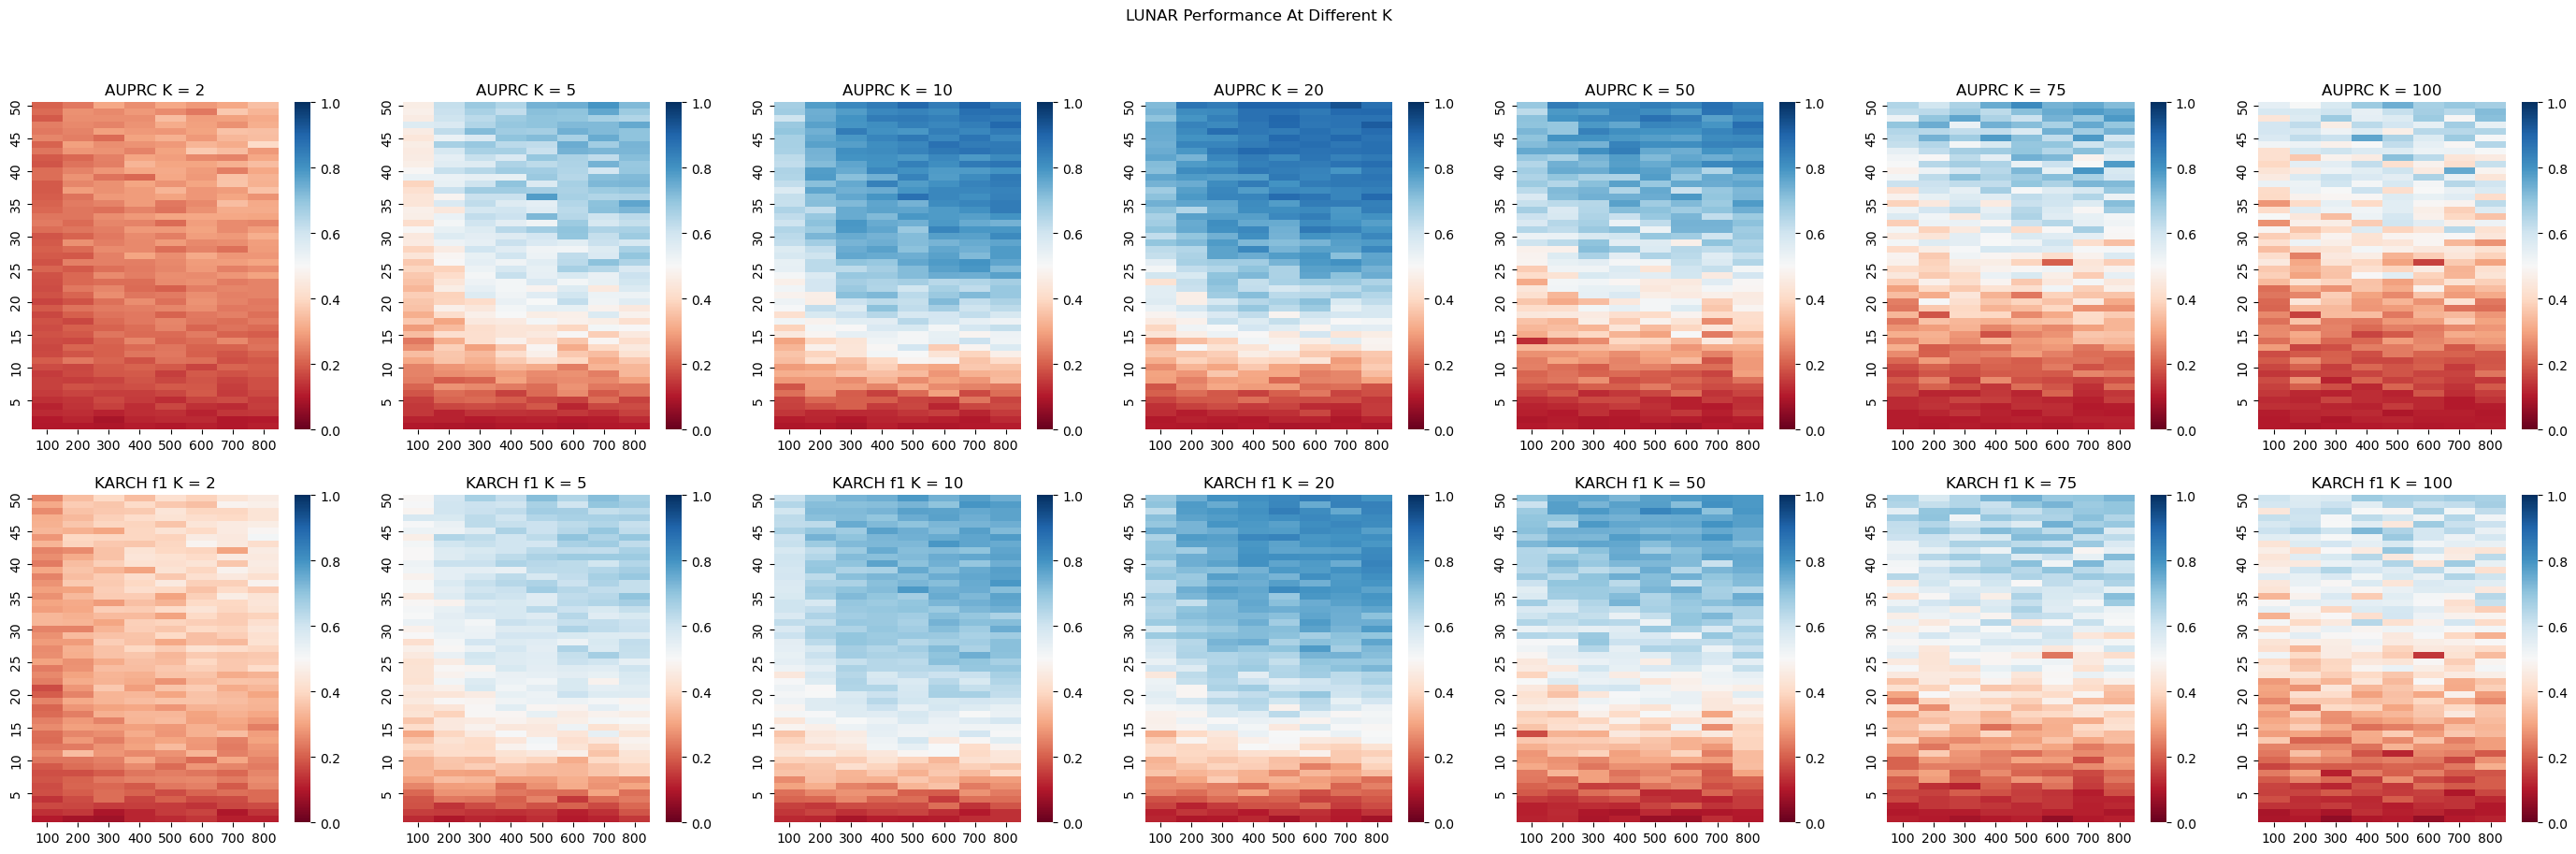

In [14]:
fig, ax = plt.subplots(ncols=7, nrows=2)
fig.suptitle('LUNAR Performance At Different K')
fig.set_size_inches(w=35, h=10)

for i, neighbours in enumerate([2, 5, 10, 20, 50, 75, 100]):
    ax[0, i].set_title(f'AUPRC K = {neighbours}')
    AUPRC_data = results[f'LUNAR_{neighbours}K_AUPRC']
    sns.heatmap(AUPRC_data.iloc[::-1], ax=ax[0, i], vmin=0, vmax=1, cmap='RdBu', yticklabels=5)
    ax[1, i].set_title(f'KARCH f1 K = {neighbours}')
    KARCH_f1_data = results[f'LUNAR_{neighbours}K_KARCH_f1']
    sns.heatmap(KARCH_f1_data.iloc[::-1], ax=ax[1, i], vmin=0, vmax=1, cmap='RdBu', yticklabels=5)

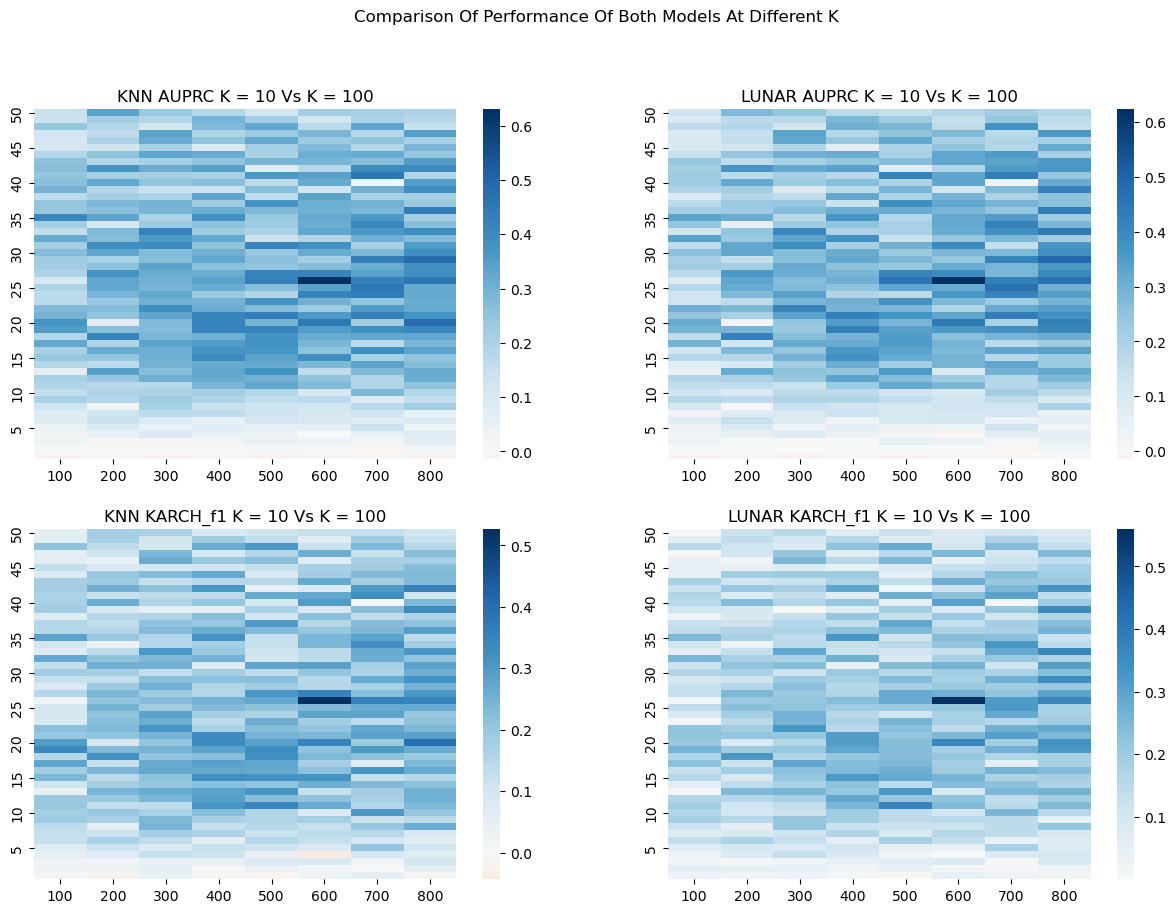

In [15]:
fig, ax = plt.subplots(ncols=2, nrows=2)
fig.suptitle('Comparison Of Performance Of Both Models At Different K')
fig.set_size_inches(w=15, h=10)

for i, model in enumerate(['KNN', 'LUNAR']):
    for j, metric in enumerate(['AUPRC', 'KARCH_f1']):
        ax[j, i].set_title(f'{model} {metric} K = 10 Vs K = 100')
        data = results[f'{model}_10K_{metric}'] - results[f'{model}_100K_{metric}']
        sns.heatmap(data.iloc[::-1], ax=ax[j, i], center=0, cmap='RdBu', yticklabels=5)